In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))
    
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [5]:
#split data into batches of 10000 points
batches10000 = [data[x:x+10000] for x in range(0, len(data), 10000)]

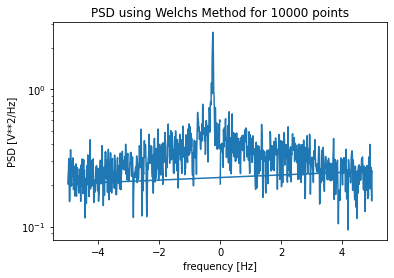

In [6]:
#calculate PSD using welch's method 
fP, Pxx_den = signal.welch(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=1024, return_onesided=False)
plt.semilogy(fP, Pxx_den)
plt.title('PSD using Welchs Method for 10000 points')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

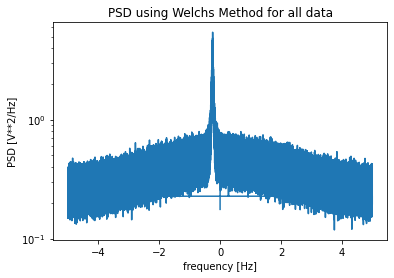

In [7]:
fall, Pxx_all = signal.welch(data-np.mean(data), 10, nperseg=1000000, return_onesided=False)
plt.semilogy(fall, Pxx_all)
plt.title('PSD using Welchs Method for all data')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.xlim(-0.3,-0.2)
plt.show()

975534
-0.24466000000000002
0.0


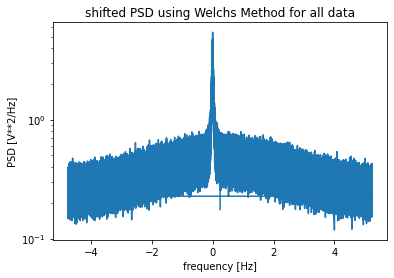

In [8]:
#shift the peak to zero before putting into calibration eqs
maxindex=np.argmax(Pxx_all)
print(maxindex)
shift=fall[maxindex]
fallshift=fall+abs(shift)
print(shift)
#print(fallshift)
print(fallshift[maxindex])

plt.semilogy(fallshift, Pxx_all)
plt.title('shifted PSD using Welchs Method for all data')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.xlim(-0.3,-0.2)
plt.show()

In [9]:
#displacement noise equation from GW Summary 
#Su(omega) =(1/k i omega)^2 * 1/Z^2 * Sv(omega)
#(1/i)^2 = -1
#omega=2pi f

#given SQUID transimpedance 
Zsquid= 1.2e6

#spectral density of voltage noise output by SQUID - convert Sv(f) to Sv(omega)=Sv here
Sv= [x*(1/2*np.pi) for x in Pxx_all]
#print(len(Sv))

#electromechanical coupling constant, this value is in range given in [2] for 10MHz mode
#or using values for 8.392MHz mode given in [3] with estimated M=1g gives order 10^-5, check with prof 
ksquared= 1e-5

#omega frequency axis, convert from Hz to rad/s and square 
omega= [x*(2*np.pi) for x in fallshift]
omegasq= [x**2 for x in omega]

#print(fallshift[0])
#print(fallshift[0]*2*np.pi)
#print(omega[0])
#print(omega[0]**2)
#print(omegasq[0])
#print(len(omegasq))

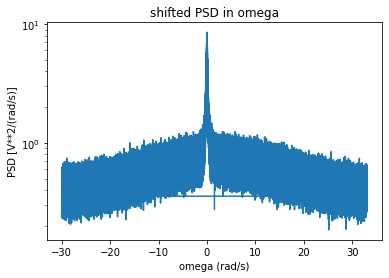

In [10]:
#checking conversion of units from Hz to omega okay
plt.semilogy(omega, Sv)
plt.title('shifted PSD in omega')
plt.xlabel('omega (rad/s)')
plt.ylabel('PSD [V**2/(rad/s)]')
#plt.xlim(-0.3,-0.2)
plt.show()

In [15]:
#multiply 1/omega^2 list and Sv 
product= [(1/a) * b for a, b in zip(omegasq, Sv)]
#print(product[0])
#print((1/omegasq[0])*Sv[0])
#note: 1/i^2 would make this negative but have left out for plotting (and - in H(iomega) would cancel?)

#put into equation for Su(omega)
constants = (1/ksquared)*1/(Zsquid**2)
Su = [x*(constants) for x in product]

#check
#print(len(Su))
#print((1/omegasq[200])*Sv[200]*constants)
#print(Su[200])

<ipython-input-15-224fbeeae50c>:2: RuntimeWarning: divide by zero encountered in double_scalars
  product= [(1/a) * b for a, b in zip(omegasq, Sv)]


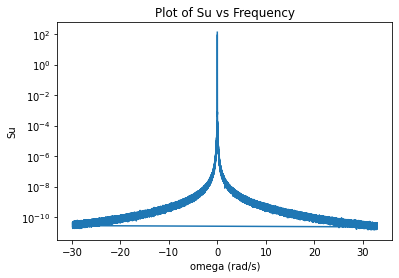

In [20]:
#plot of Su(omega) vs omega
plt.semilogy(omega, Su)
plt.title('Plot of Su vs Frequency')
plt.xlabel('omega (rad/s)')
plt.ylabel('Su')
plt.show()

In [22]:
#transfer function equation
#H(iomega)= - (xi*ho*omega^2/2) / (iomega)^2 + tau^-1*omega + omega_n^2
#xi = 8/n*pi Erf(sqrt(n)*eta_x)Erf(sqrt(n)*eta_y) / Erf(sqrt(2n)*eta_x)Erf(sqrt(2n)*eta_y)

eta_x = eta_y = 10
ho =
tau = 
n =